# PHYS 321 Coding Lab #5: Code Testing and Bayesian Statistics with M&Ms and Radioactivity

In this Coding Lab, our goal is to learn about code testing and to sharpen our Bayesian statistics skills.

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

## Bayesian inference with M&Ms

(Note: I am indebted to Prof. Gwen Eadie of the University of Toronto, who pioneered a similar M&Ms-based teaching activity while a postdoctoral scholar at the University of Washington)

<div>
<img src="images/M&Ms.jpg" width="400">
</div>

If you've consumed M&Ms before, you are probably aware that M&Ms come in a variety of different colours: red, orange, yellow, green, brown, and blue. Exactly how many of each colour one gets in a packet will depend on systematic effects (e.g., at which factory the packet was assembled) and will also have some randomness to it.

What we will do today is to answer the following question: __what fraction $b$ of M&Ms do we expect to be blue?__ The goal is to set up the problem as a Bayesian inference problem.

One approach might be to open up a packet of M&Ms, and then to just count up the number of blue M&Ms, divide by the total number of M&Ms, and declare that to be your answer. However, such an approach does not account for the fact that there is some randomness to the problem.

Recall that Bayes' theorem says that if we want to infer a parameter $b$, we can take some data $d$ and compute

\begin{equation}
p(b|d) \propto p(d|b) p(b),
\end{equation}
where $p(b|d)$ is the *posterior* distribution for the parameter $b$ given the measured data $d$, $p(d|b)$ is the *likelihood* function that tells us the probability of measuring data $d$ given the value $b$, and $p(b)$ is our *prior* belief on the distribution of $b$ before we've taken any data. In this case, our data is the number of blue M&Ms that we find in our packet. After we've collected our data, plugging $d$ into Bayes theorem might give something like this:

<div>
<img src="images/fake_posterior.png" width="400">
</div>
Your posterior distribution will not look like this (because I made the plot using fake data). But if this had in fact been the result, it would lead you to conclude that the probability of getting a blue M&M is about $b \approx 0.6$. The error bar on your estimate of $b$ would be determined by the width of this distribution.

__Question__: Let's get started on our Bayesian inference. Write down the likelihood function $p(d|b)$.

[Hint: think of $b$ as the fraction of blue M&Ms that are produced at the factory. Now imagine that you work at the factory, and your job is to fill a bag containing $n$ M&Ms. You fill the bag one M&M at a time each time drawing from what is (approximately) an infinite pool of M&Ms in the factory. What is the probability that you end up with $d$ blue M&Ms in a packet containing a total of $n$ M&Ms?]

## Answer
with probability of single M&M to be blue: $p = b$,
\begin{equation}
P(d|b)={n \choose d}{b^d}(1-b)^{n-d}.
\end{equation}



In [3]:
def binomial(p, n, d):
    return (math.comb(n,d) * p**d * (1-p)**(n-d))

def likelihood_normalized(b, n, d):
    # p(d|b)
    f = lambda x: binomial(x, n, d)
    # to normalize so it integrate to 1
    # #we have to devide it by the mean
    mean = np.sum(f(b))
    return f(b)/mean

Our next step is to decide on a prior distribution. In principle, this can be anything that reflects your belief (your "best guess" prior to conducting the experiment). As an example, suppose I am trying to measure the distance $d_\textrm{gal}$ to a galaxy. I measure $d_\textrm{meas}$, with an error bar of $\sigma_m$. If my measurement errors are Gaussian-distributed, my likelihood function is

\begin{equation}
p(d_\textrm{meas} | d_\textrm{gal}) = \frac{1}{\sqrt{2 \pi \sigma_m^2}} \exp \left[- \frac{(d_\textrm{gal} - d_\textrm{meas})^2}{2 \sigma_m^2}\right].
\end{equation}

Now suppose that my prior belief on $d_\textrm{gal}$ is also Gaussian distributed, but centred about some guess $d_\textrm{guess}$:

\begin{equation}
p(d_\textrm{gal}) = \frac{1}{\sqrt{2 \pi \sigma_p^2}} \exp \left[- \frac{(d_\textrm{gal} - d_\textrm{guess})^2}{2 \sigma_p^2}\right],
\end{equation}
where $\sigma_p$ is the uncertainty in my prior knowledge.

If I multiply the likelihood by the prior to get the posterior, a little algebraic simplification reveals that

\begin{equation}
p(d_\textrm{gal} | d_\textrm{meas}) \propto \exp \left[ -\frac{(d_\textrm{gal} - \overline{d})^2}{2 \overline{\sigma}^2}\right],
\end{equation}
where $\overline{d} \equiv (d_\textrm{meas}/\sigma_m^2 + d_\textrm{guess}/\sigma_p^2)/(1/\sigma_p^2 + 1/ \sigma_m^2)$ and $\overline{\sigma} \equiv (1/\sigma_p^2 + 1/ \sigma_m^2)^{-1/2}$. Graphically, this looks like:
<div>
<img src="images/gauss_conjugate.png" width="800">
</div>
This illustrates the idea that a Bayesian analysis takes a broad, unconstrained distribution of possibilities and updates it using data.

Back to the M&Ms. What's your prior on $b$, the fraction of blue M&Ms in a packet?

__Exercise__: Write a function that generates a plot of your prior on $b$.

In [4]:
def normal(x, x0, sigma=0):
    '''
    x: data tested
    x0: mean
    sigma: error
    '''
    if sigma == 0:
        sigma=np.std(x)#/np.sqrt(len(x))
    return (np.exp(-(x-x0)**2 / (2*sigma**2)) / np.sqrt(2*np.pi*sigma**2))

def prior_normalized(b, guess=1/6, err=0.1):
    # p(b)
    f = lambda x: normal(x, guess, err)
    # to normalize so it integrate to 1
    # #we have to devide it by the mean
    mean = np.sum(f(b))
    return f(b) / mean

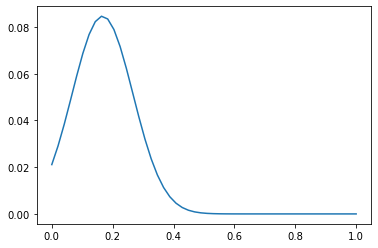

In [5]:
def plot_prior(n=50):
    b = np.linspace(0, 1, n)
    plt.plot(b, prior_normalized(b))
    plt.show()

plot_prior()

## Discussion

we take a guess of mean $b=1/6$ as there are 6 colors in a pack.


__Exercise__: Write some code that will take in your measured data ($d$ blue M&Ms out of a packet containing $n$ M&Ms) and generate plots of the prior, likelihood, and posterior distributions. (Hint: Don't forget that even though we've written a lot of our probability distributions with proportionality signs so far, a proper probability distribution function needs to be normalized so that it integrates to 1!)

In [6]:
def posterior_normalized(b, n, d, guess=1/6, guess_err=0.1):
    # p(b|d)
    f = lambda x: normal(x, guess, guess_err) * binomial(x, n, d)
    # to normalize so it integrate to 1
    # #we have to devide it by the mean
    mean = np.sum(f(b))
    return f(b) / mean

In [7]:
def plot_and_find_max(n, d, name, guess, guess_err):
    bspace = np.linspace(0, 1, n)

    # plot
    plt.plot(bspace, prior_normalized(bspace, guess=guess, err=guess_err), 'k--', label='prior')
    plt.plot(bspace, likelihood_normalized(bspace, n, d), 'b', label='likelihood')
    plt.plot(bspace, posterior_normalized(bspace, n, d, guess=guess, guess_err=guess_err), 'r-.', label='posterior')
    plt.xlabel('$b$')
    plt.ylabel('$Probability Density$')
    plt.legend()
    plt.title(name)
    plt.show()

    # find max posterior
    max_b = bspace[posterior_normalized(bspace, n, d, guess=guess, guess_err=guess_err).argmax()]
    print('b with highest probility for this plot is ', max_b)

    return max_b

__Time to open up your packet of M&Ms!__ (Not a bad idea at this point to summon one of us to check your work so far)

__Exercise__: Open your packet of M&Ms and count the number of blue M&Ms. Plot the prior, likelihood, and posterior distributions. Feel free to eat your data when you are done!

In [8]:
# load data
data = [[456, 123, 'me(Claire)'],
        [455, 137, 'me(Claire)'],
        [413, 129, 'Juan'],
        [467,118, 'Juan']]

df = pd.DataFrame(data, columns=['n', 'd', 'source'])
print(df)

     n    d      source
0  456  123  me(Claire)
1  455  137  me(Claire)
2  413  129        Juan
3  467  118        Juan


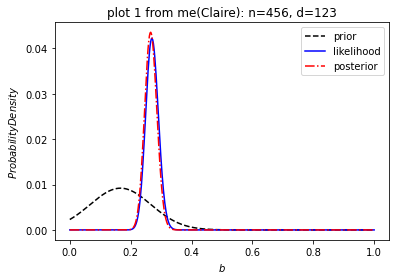

b with highest probility for this plot is  0.26593406593406593


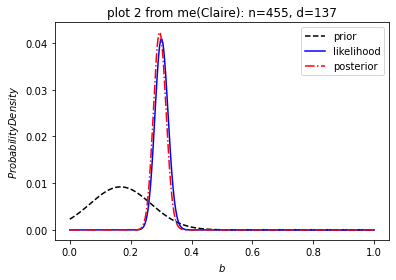

b with highest probility for this plot is  0.29515418502202645


In [9]:
guess = 1/6
guess_err = .1

for i in range(2):  # (df.shape[0]):
    # here i only plot my data to save space
    n = df['n'][i]
    d = df['d'][i]
    source = df['source'][i]
    name = 'plot %d from %s: n=%d, d=%d'%((1+i), source, n, d)
    plot_and_find_max(n,  d, name, guess, guess_err)


__Exercise__: Combine data with your partners. There are two ways to do this. One way is to simply combine your datasets into one big dataset and to redo your analysis. Another way to approach this is to use your posterior distribution as the prior for a second round of Bayesian updating. The posterior that comes out of that is then the prior for a third round etc. Do you get the same final posterior with the two methods? Plot the posterior that came from just your data and the posterior from everyone's data in the same figure. What happens as more and more data is added?

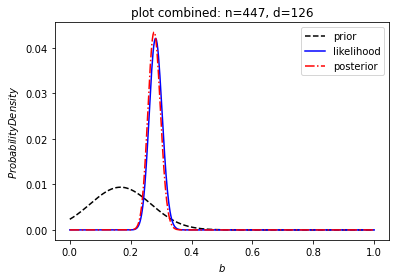

b with highest probility for this plot is  0.2780269058295964


0.2780269058295964

In [10]:
# method 1
# the sum of data is too big 
# which can cause overflow of math.comb() in binomial distribution
#so i take avgerage here
n_avg = int(np.average(df['n']))
d_avg = int(np.average(df['d']))
name = 'plot combined: n=%d, d=%d'%(n_avg, d_avg)
plot_and_find_max(n_avg, d_avg, name, guess, guess_err)


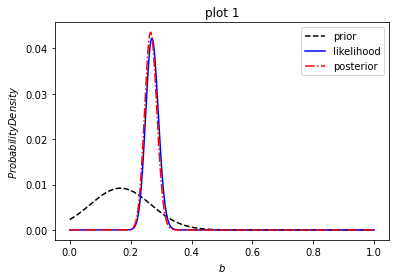

b with highest probility for this plot is  0.26593406593406593


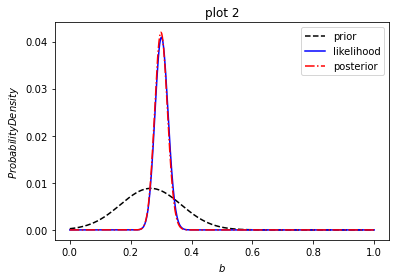

b with highest probility for this plot is  0.2995594713656388


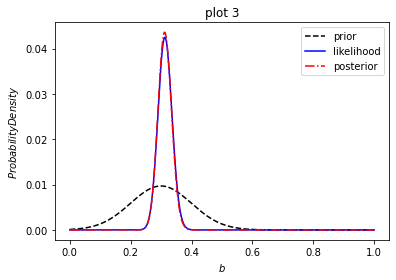

b with highest probility for this plot is  0.3106796116504854


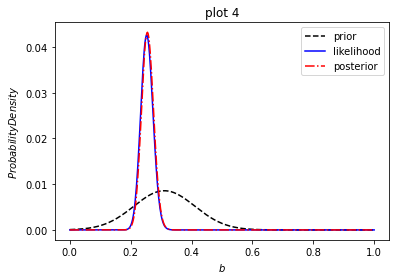

b with highest probility for this plot is  0.2553648068669528


In [11]:
# method 2
guess = 1/6
guess_err = .1
for i in range(df.shape[0]):
    n = df['n'][i]
    d = df['d'][i]
    name = 'plot %d'%(i+1)
    guess = plot_and_find_max(n, d, name, guess, guess_err)

# Discuss
The two methods gives quite different results. As the first is just take combination without weighted data, while the second method is more dependent on the last data plotted.(as the likelihood curve is shaper, thus the product is more like the likelihood curve, which depends on data)

If more and more data added, the guess of prior will be more accurate. This will increase accuracy of the final posterior.

According to The Internet, there are two factories that package M&Ms. One is located in Hackettstown, New Jersey, while the other is located in Cleveland, Tennessee. It turns out that depending on where the M&Ms were packaged, the value of $b$ differs! Here are the colour distributions ([Eadie et al. 2019](https://arxiv.org/abs/1904.11006)):

<div>
<img src="images/factorydistributions.png" width="400">
</div>

__Question__: Based on your posterior distribution for $b$, which factory do you think your M&Ms came from? If you look at the serial number of your packet (it's below where they have the "best before" date), you can see which factory your packet came from: if it contains "CLV" it came from the Tennesse factory; if it contains "HKP", it came from the New Jersey factory. Is your statistical analysis consistent with the serial number? A fascinating thing that I found when buying M&Ms is that there seems to be a third factory that is now manufacturing M&Ms! If you have a packet that is from neither "CLV" nor "HKP", what can you say about the distributions? Is it close to one of the old factories? Or does it seems like a different distribution altogether?

## Answer
The b I got from the two method above is $b_1 \approx 0.2803$ and $b_2 \approx 0.2554$. Take the middle and i got $b \approx 0.2678$. My packet is from neither "CLV" nor "HKP". But my result is close to the New Jersey one.

## Quantifying Errors

In principle, the posterior is everything we want, giving us detailed information about the distribution of possible values of a parameter. If possible, one should report posteriors. However, sometimes someone will ask you "but if you had to quote a single number and its error bars, what would it be?"

One complication with distilling our results into a single number and an error bar is that posterior distributions are often quite complicated. For example, consider the two probability distributions in the picture below:
<div>
<img src="images/multimodal.png" width="400">
</div>

If one's probability distribution is nice and Gaussian like with the black dashed line, the problem is easy. In this case, we get the same answer whether we quote the mean (average value), the median (the middle value if we rank-order all possible values from lowest to highest), or the mode (likeliest value, i.e., the $x$ value where the probability distribution peaks). The error bar $\Delta x$ is then defined as the standard deviation of the distribution, or---equivalently, for a Gaussian distribution---the width $\Delta x$ such that  $68\%$ of the probability resides within $\pm \Delta x$ of the mean.

For the red, non-Gaussian (and multimodal!) probability distribution, the mean ($\approx 4.2$), the median ($\approx 4.3$), and the mode ($\approx 3$). Which one do we quote?

There is no "right answer" here, and different people do different things. (I guess the only "right answer" is to say that if the probability distribution is complicated, one should report the full posterior to make it clear what's going on!) One option is to quote the median and then to examine the *cumulative distribution function* to help us figure out the errors. The cumulative distribution function $P(x)$ for a particular probability distribution $p(x)$ is defined as

\begin{equation}
P(x) = \int_{-\infty}^x p(x^\prime) dx^\prime.
\end{equation}
What it tells us is the probability of getting an answer smaller than $x$. For example, if $P(x=6.2) = 0.3$, it means that the $30\%$ of random draws from the distribution will give values less than $6.2$. We say that the value $6.2$ is the $30$th percentile of the distribution. The median, by definition, is the $50$th percentile of a distribution.

In the plot below, we show the cumulative distribution functions for the probability distributions shown above:
<div>
<img src="images/CDFs.png" width="400">
</div>
The orange lines show how one can use a cumulative distribution function plot to read off the $16$th percentile, $50$th percentile (i.e., the median), and the $84$th percentile. Why are we interested in these values? Because $84 - 16 = 68$, so between the orange lines, we enclose $68\%$ of the probability. We can use this to figure out "the" error bars on our result. In this case, we quote the median value and then the distance on either side to get to the $16$th and $84$th percentiles. Here, we would say $x = 4.3^{+1.2}_{-1.4}$. (Note the asymmetry of the error bars!) Another way to express our result would be to say that our $68\%$ credible region spans the range $x\approx 2.9$ to $x \approx 5.5$.

__Exercise__: Write a function that takes in your posterior distribution for $b$ from above, and returns the $n\%$ credible region (e.g., $68\%$, $95\%$ etc.)

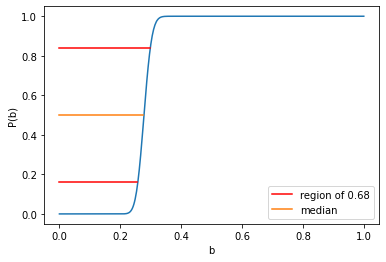

the region of 0.68 is 0.2556053811659193 to 0.2982062780269058
meadian at 0.2757847533632287


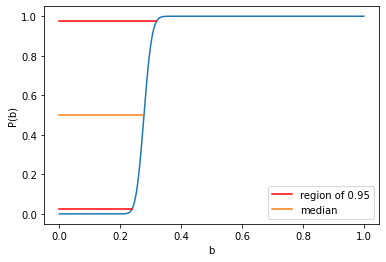

the region of 0.95 is 0.23766816143497757 to 0.3183856502242152
meadian at 0.2757847533632287


(0.23766816143497757, 0.2757847533632287, 0.3183856502242152)

In [12]:
def plot_CDF_region(region_n=68, n=n_avg, d=d_avg):
    # load data
    xspace = np.linspace(0, 1, n)
    p = posterior_normalized(xspace, n, d, guess=1/5, guess_err=0.1)
    p_cum = np.cumsum(p)
    data =  {'x': xspace, 'pdf': p, 'cdf': p_cum}
    df_avg = pd.DataFrame(data=data)

    region_n = region_n/100

    lower = (1 - region_n) / 2
    x_lower = df_avg.loc[(df_avg['cdf'] <= lower), ['x']]
    y_lower = np.empty(len(x_lower))
    y_lower.fill(lower)

    higher = 1 - lower
    x_higher = df_avg.loc[(df_avg['cdf'] <= higher), ['x']]
    y_higher = np.empty(len(x_higher))
    y_higher.fill(higher)

    median = 0.5
    x_median = df_avg.loc[(df_avg['cdf'] <= median), ['x']]
    y_median = np.empty(len(x_median))
    y_median.fill(median)

    plt.plot(xspace, p_cum)
    plt.plot(x_lower, y_lower, 'r', label='region of %s'%region_n)
    plt.plot(x_higher, y_higher, 'r')
    plt.plot(x_median, y_median, label='median')
    plt.xlabel('b')
    plt.ylabel('P(b)')
    plt.legend()
    plt.show()

    # return region
    lower_bound = x_lower['x'][x_lower.shape[0]-1]
    higher_bound = x_higher['x'][x_higher.shape[0]-1]
    median_at = x_median['x'][x_median.shape[0]-1]
    print('the region of %s is %s to %s'%(region_n, lower_bound, higher_bound))
    print('meadian at', median_at)
    return lower_bound, median_at, higher_bound

plot_CDF_region(68)
plot_CDF_region(95)

__Question__: To what level of credibility (e.g., $68\%$? $95\%$?) can you rule out the possibility that your packet of M&Ms came from a different factory to your "best guess"?

## Answer
The New Jersey factory is within region of 95% but not in 68%, which is in two standard deviations in normal distribution. I can rule it out.

## A Radioactive Source
(This problem is adapted from an example from Information Theory, Inference, and Learning Alogrithms by MacKay)

Consider the experimental setup depicted below:

<div>
<img src="images/radioactivity.png" width="400">
</div>

Unstable radioactive particles are emitted from a source and decay at a distance $x$, a real number that has an exponential probability distribution with characteristic length $\lambda$, i.e., $p(x|\lambda) \propto \exp( - x / \lambda)$. Decay events can be observed only if they occur in a window extending from $x=1\,\textrm{cm}$ to $x=20\,\textrm{cm}$. Decays are observed at $x_1$, $x_2$, $\dots$, $x_N$. The values of these data points are stored in a file called ``radioactive.dat``

Our goal is to use Bayesian inference to figure out what $\lambda$ is. In other words, we would like to find the posterior distribution $p(\lambda | x_1, x_2, \dots, x_N)$. Bayes' theorem tells us that

\begin{equation}
p(\lambda | x_1, x_2, \dots, x_N) \propto p( x_1, x_2, \dots, x_N | \lambda ) p (\lambda)
\end{equation}

As with so many Bayesian inference problems, the hardest part is figuring out how to write down the likelihood function $p( x_1, x_2, \dots, x_N | \lambda )$. Since the radioactive decays are independent of one another, we can write

\begin{equation}
p( x_1, x_2, \dots, x_N | \lambda ) = p( x_1| \lambda )p( x_2| \lambda )\dots p( x_N| \lambda )
\end{equation}

__Exercise__: Write down $p(x|\lambda)$, taking care to make sure that it is a properly normalized probability distribution in $x$. (Recall that we only observe the particles if $x$ is between $1\,\textrm{cm}$ and $20\,\textrm{cm}$).

## Answer
 (c is constant)
as $P(x|\lambda)=c.e^{-x/\lambda}$

take $P(x=1|\lambda) = c.e^{-1/\lambda}=p_1$
\begin{equation}
P(x=x_i|\lambda) = {p_1}^{x_i}
\end{equation}


In [1]:
'''not sure if to add below equation to above answer

where to normalize:
\begin{equation}
\sum_{x_i \in [1,20]} p( x_i | \lambda ) = \\ \sum_{x_i \in [1,20]} c. \exp(-x/ \lambda)=c \int_{1}^{20} \exp(-x/\lambda) dx \\
\end{equation}
\begin{equation}
= \lambda [p_1-{p_1}^{20}] = 1
\end{equation}
we can get $p_1$ in terms of $\lambda$.'''

'not sure if to add below equation to above answer\nwhere to normalize:\n\x08egin{equation}\n\\sum_{x_i \\in [1,20]} p( x_i | \\lambda ) = \\ \\sum_{x_i \\in [1,20]} c. \\exp(-x/ \\lambda)=c \\int_{1}^{20} \\exp(-x/\\lambda) dx \\\n\\end{equation}\n\x08egin{equation}\n= \\lambda [p_1-{p_1}^{20}] = 1\n\\end{equation}\nwe can get $p_1$ in terms of $\\lambda$.'

__Exercise__: Assuming a uniform prior for $\lambda$, write some code to generate posterior distributions for $\lambda$. Make your code flexible enough that you can vary $N$, the number of data points that you read in from ``radioactive.dat``. Plot a series of posterior curves that show how one's knowledge of $\lambda$ improves as more and more data are taken.

(Note 1: ``lambda`` functions are [a thing in Python](https://www.w3schools.com/python/python_lambda.asp). To avoid confusion, it might be good to avoid giving $\lambda$ the variable name ``lambda`` in your code)

(Note 2: Your code may take a few minutes to run. This is normal. There are a lot of exponentials to evaluate, and exponentiating numbers is a fairly slow operation).

In [13]:
from scipy.optimize import curve_fit

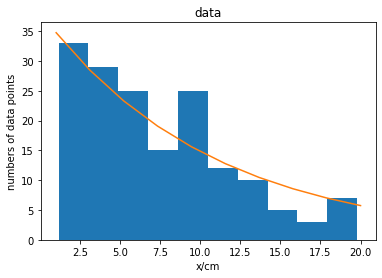

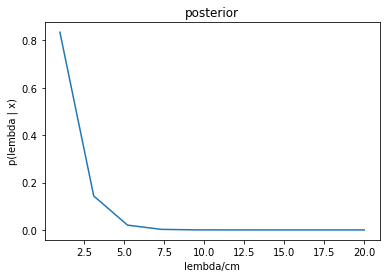

from data we get lambde and constant c is  10.555314731966716 0.23275489650455652


In [43]:
xdata = np.loadtxt('radioactive.dat')

# as const prior, likelihood has same shape as posterior
def plot_posterior(n=164, xdata=xdata, bins=10, doPlot=True):
    if n < len(xdata):
        xdata = xdata[:n]
    xspace = np.linspace(1, 20, bins)
    h, bins = np.histogram(xdata, bins=bins)

    def likeli(x, lemb, c):
        f = lambda x: np.exp(-x/lemb)
        #sum = np.sum(f(x))
        return f(x)*c

    popt, _ = curve_fit(likeli, xspace, h)
    lamb = popt[0]
    c = popt[1]
    if doPlot:
        plt.hist(xdata, bins=bins)
        plt.plot(xspace, likeli(xspace, lamb, c))
        plt.title('data')
        plt.xlabel('x/cm')
        plt.ylabel('numbers of data points')
        plt.show()

    def posterior(x):
        fx = likeli(x, lamb, c)
        fx = fx/np.sum(fx)
        fx = np.cumprod(fx)
        return fx/np.sum(fx)

    if doPlot:
        plt.plot(xspace, posterior(xspace))
        plt.title('posterior')
        plt.xlabel('lembda/cm')
        plt.ylabel('p(lembda | x)')
        plt.show()

        print('from data we get lambde and constant c is ',lamb, c/len(xdata))

    return lamb, (c/len(xdata))


lamb_all, c_all = plot_posterior()

__Exercise__: What is your $95\%$ credible region for $\lambda$ after 3 measurements (i.e., using $3$ values of $x$)? After $10$? After $50$? After $99$?

/Users/yy/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


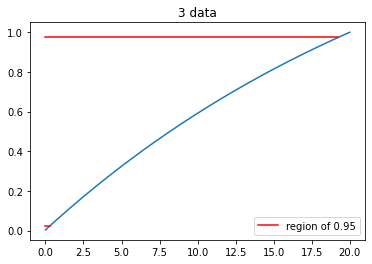

the range for 0.95 with 3 data is 0.3007518796992481 to 19.24812030075188


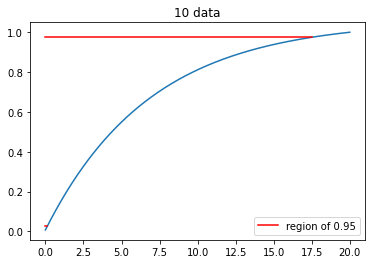

the range for 0.95 with 10 data is 0.10025062656641603 to 17.493734335839598


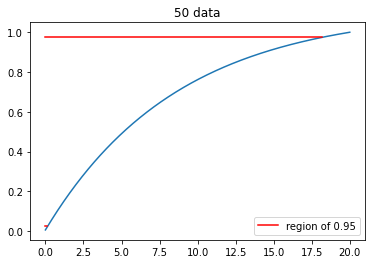

the range for 0.95 with 50 data is 0.10025062656641603 to 18.19548872180451


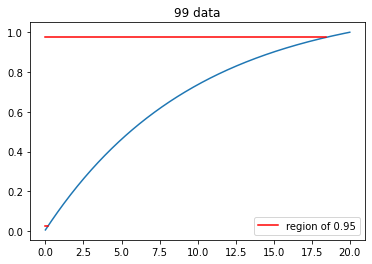

the range for 0.95 with 99 data is 0.15037593984962405 to 18.44611528822055


In [50]:
def find_region(n=3, bins=10, percent=.95):
    lamb, c = plot_posterior(n=n, bins=bins, doPlot=False)


    def posterior(x):
        f = lambda x: np.exp(-x/lamb) * c
        sum = np.sum(f(x))
        return f(x)/sum
    
    x = np.linspace(0, 20, 400)
    p = posterior(x)
    p_cum = np.cumsum(p)

    lower = (1 - percent) / 2
    x_low = x[p_cum<=lower]
    y_low = np.empty(len(x_low))
    y_low.fill(lower)

    higher = 1 - lower
    x_high = x[p_cum<=higher]
    y_high = np.empty(len(x_high))
    y_high.fill(higher)

    plt.plot(x, p_cum)
    plt.plot(x_low, y_low, 'r', label='region of %s'%percent)
    plt.plot(x_high, y_high, 'r')
    plt.title('%s data'%n)
    plt.legend()
    plt.show()

    low = x_low[-1]
    high = x_high[-1]
    print('the range for %s with %s data is %s to %s'%(percent, n, low, high))


find_region(n=3, bins=2)
find_region(n=10, bins=5)
find_region(n=50, bins=15)
find_region(n=99, bins=20)

## Submitting your work

Don't forget to push a copy of your completed notebook to your Github repo for marking!